In [1]:
# Import the libraries
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import yfinance as yf


from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.api import OLS

In [2]:
# Get the stock data for AAPL from Yahoo Finance
df = yf.download('UNTR.JK', start='2020-06-01', end='2021-06-01')

# Show the data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-02,15600.0,16575.0,15500.0,16375.0,11065.788086,6569200
2020-06-03,16375.0,17275.0,16375.0,17075.0,11538.829102,7542300
2020-06-04,17125.0,17675.0,16750.0,17000.0,11488.145508,5368300
2020-06-05,17000.0,17225.0,16750.0,17100.0,11555.724609,1971200
2020-06-08,17300.0,17800.0,17200.0,17550.0,11859.822266,3165000
...,...,...,...,...,...,...
2021-05-24,21675.0,21825.0,21200.0,21200.0,15446.362305,4470900
2021-05-25,21300.0,21700.0,21025.0,21500.0,15664.942383,4899200
2021-05-27,21675.0,22200.0,21525.0,21650.0,15774.234375,7901900


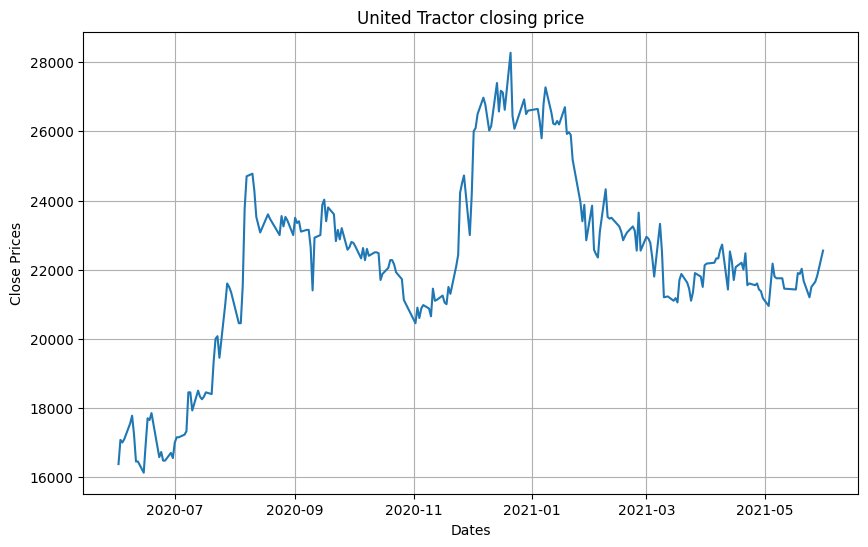

In [3]:
# plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(df['Close'])
plt.title('United Tractor closing price')
plt.show()

<Axes: ylabel='Density'>

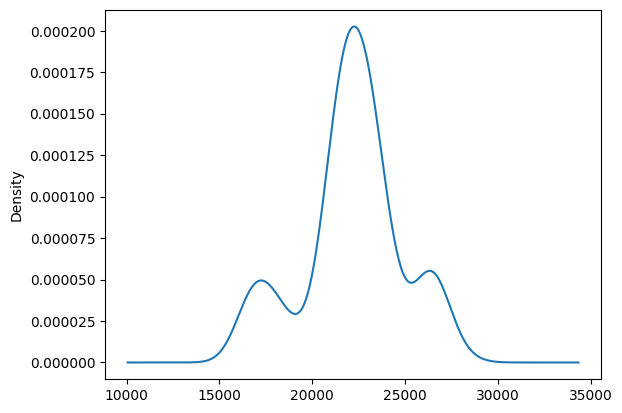

In [4]:
#Distribution of the dataset
df['Close'].plot(kind='kde')
#We can observe a near-normal distribution(bell-curve) over sales values.

### **Stationary by ACF PACF**

In [5]:
untrC = df[['Close']].copy(deep=True)
untrC['diff1'] = untrC['Close'].diff()
untrC['diff2'] = untrC['Close'].diff(2)
print(untrC)

              Close  diff1  diff2
Date                             
2020-06-02  16375.0    NaN    NaN
2020-06-03  17075.0  700.0    NaN
2020-06-04  17000.0  -75.0  625.0
2020-06-05  17100.0  100.0   25.0
2020-06-08  17550.0  450.0  550.0
...             ...    ...    ...
2021-05-24  21200.0 -475.0 -825.0
2021-05-25  21500.0  300.0 -175.0
2021-05-27  21650.0  150.0  450.0
2021-05-28  21825.0  175.0  325.0
2021-05-31  22550.0  725.0  900.0

[241 rows x 3 columns]


In [6]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from pylab import rcParams

In [7]:
# Stastionerity - Augmented Dicky Fuller Test (ADF Test)
adf = adfuller(untrC['Close'])
if adf[1] < 0.05 :
    print ('Data Stasioner')
else :
    print ('Data Tidak Stasioner')

Data Tidak Stasioner


In [8]:
# Lakukan Augmented Dicky Fuller Test pada data hasil diff(1)
adf = adfuller(untrC['diff1'].dropna())
if adf[1] < 0.05:
    print('Data Stasioner')
else:
    print('Data Tidak Stasioner')

Data Stasioner


In [9]:
# Membuat plot ACF dan PACF

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


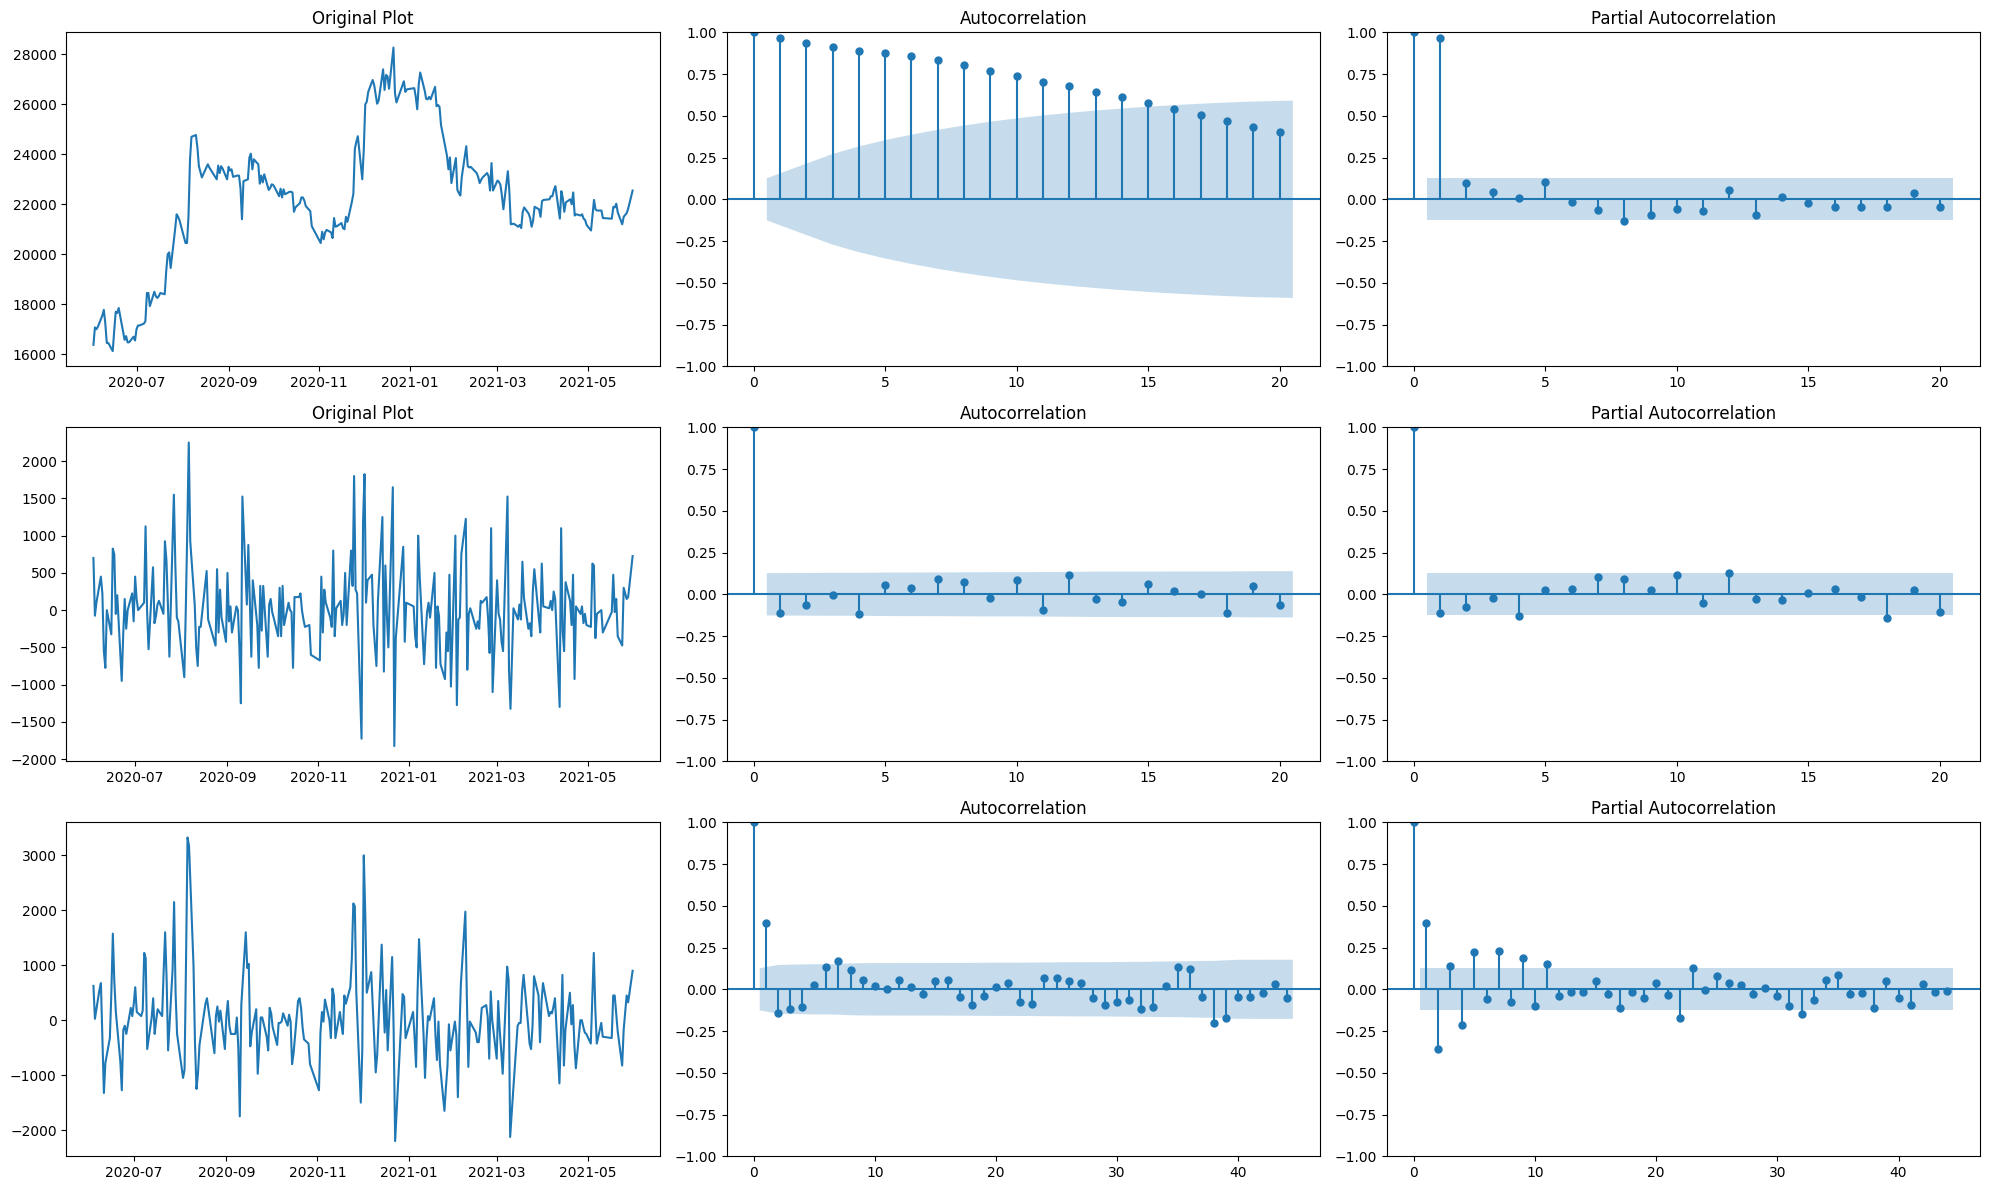

In [11]:
# Original Series
fig, axes = plt.subplots(3, 3, figsize = (20,12)) # 2 kolom 3 baris
axes[0,0].plot(untrC['Close']);axes[0,0].set_title('Original Plot') #baris dan kolom pada index 0(pertama)
plot_acf(untrC['Close'],lags=20, ax = axes[0,1])
plot_pacf(untrC['Close'],lags=20, ax = axes[0,2])

# 1st Differencing
axes[1,0].plot(untrC['diff1']);axes[1,0].set_title('Original Plot') #baris dan kolom pada index 0(pertama)
plot_acf(untrC['diff1'].dropna(),lags=20, ax = axes[1,1])
plot_pacf(untrC['diff1'].dropna(),lags=20, ax = axes[1,2])

# 2nd Differencing
axes[2,0].plot(untrC['diff2']);axes[1,0].set_title('Original Plot') #baris dan kolom pada index 0(pertama)
plot_acf(untrC['diff2'].dropna(),lags=44, ax = axes[2,1])
plot_pacf(untrC['diff2'].dropna(),lags=44, ax = axes[2,2])

plt.tight_layout()
plt.show()

### **ARIMA Model**

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25 entries, 2021-04-21 to 2021-05-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   25 non-null     float64
 1   diff1   25 non-null     float64
 2   diff2   25 non-null     float64
dtypes: float64(3)
memory usage: 800.0 bytes


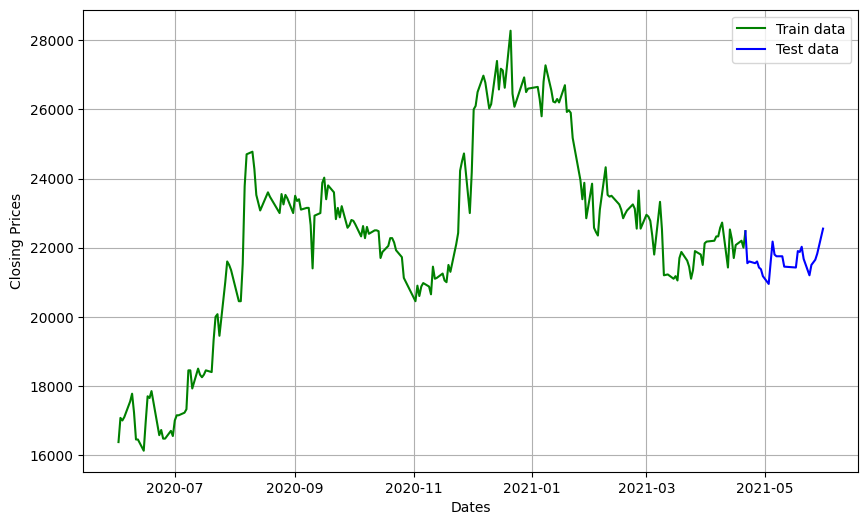

In [12]:
# Split data into train and test sets
train1 = untrC[:round(len(untrC)*0.9)]
test1 = untrC[round(len(untrC)*0.9)-1:]
test1.info()
# Plot the training data in green and the test data in blue
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train1['Close'], 'green', label='Train data')
plt.plot(test1['Close'], 'blue', label='Test data')
plt.legend()
plt.show()


Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=3541.826, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=3494.361, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3539.831, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=3469.337, Time=0.19 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=3463.122, Time=0.09 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=3461.134, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=3467.484, Time=0.03 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=3421.882, Time=0.30 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=3423.594, Time=0.48 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.42 sec

Best model:  ARIMA(3,2,1)(0,0,0)[0]          
Total fit t

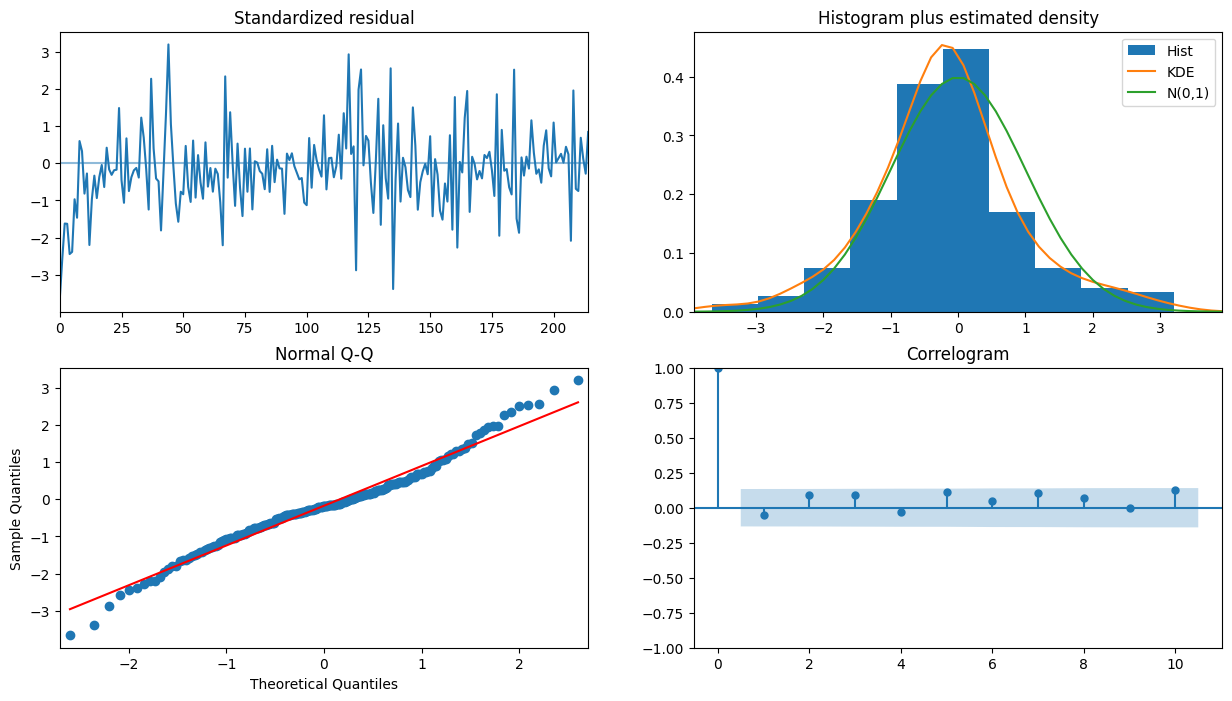

In [14]:
# Auto arima gives the value of p,q,d as 3,1,2
model_autoARIMA = auto_arima(train1['Close'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=2,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [15]:
# Build Model
model = ARIMA(train1['Close'], order=(3, 2, 1))  
fitted = model.fit()  
print(fitted.summary())
arimaPred = fitted.forecast(len(test1))

c:\Users\Farisyid\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Farisyid\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Farisyid\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  217
Model:                 ARIMA(3, 2, 1)   Log Likelihood               -1705.941
Date:                Wed, 15 Nov 2023   AIC                           3421.882
Time:                        10:31:48   BIC                           3438.735
Sample:                             0   HQIC                          3428.691
                                - 217                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0436      0.048      0.916      0.360      -0.050       0.137
ar.L2         -0.0827      0.045     -1.834      0.067      -0.171       0.006
ar.L3         -0.0198      0.050     -0.396      0.6

c:\Users\Farisyid\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Farisyid\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [16]:
arima = pd.DataFrame(arimaPred).set_index(test1.index)
arima

,predicted_mean
Date,
2021-04-21,22504.125435
2021-04-22,22464.446901
2021-04-23,22445.274519
2021-04-26,22441.517858
2021-04-27,22438.099688
2021-04-28,22433.015158
2021-04-29,22427.524684
2021-04-30,22422.147633
2021-05-03,22416.842104


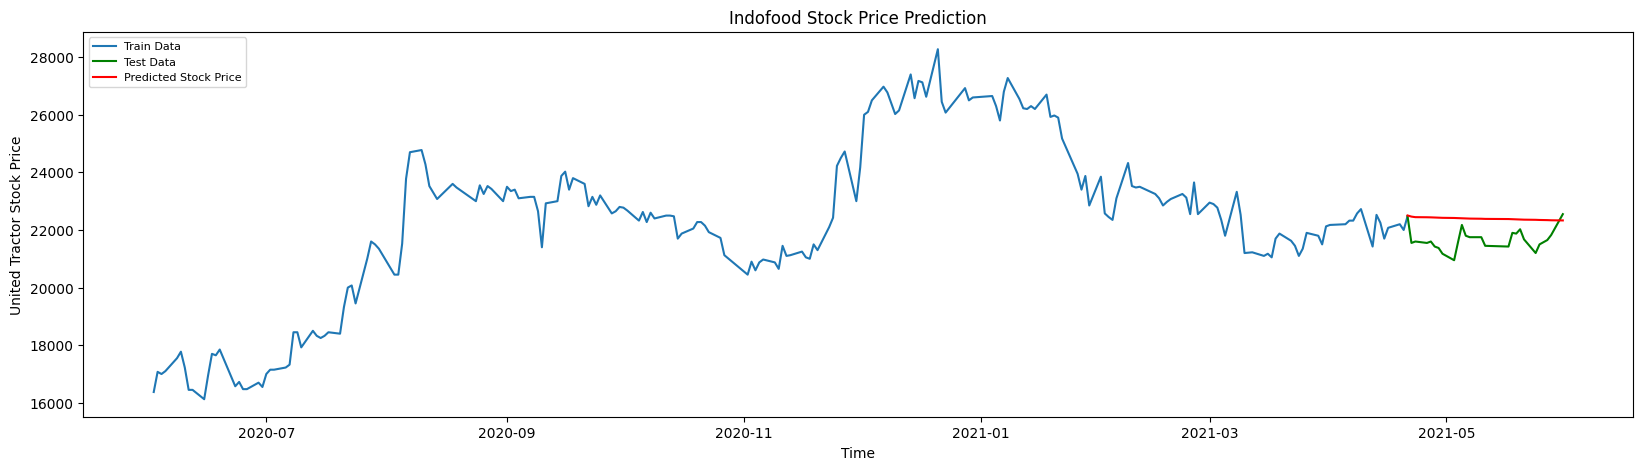

In [17]:
# Plot
plt.figure(figsize=(20, 5), dpi=100)
plt.plot(train1['Close'], label='Train Data')
plt.plot(test1['Close'], label='Test Data', color='green')
plt.plot(arima, color='red', label='Predicted Stock Price')
plt.title('Indofood Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('United Tractor Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=3539.831, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=3492.358, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=3418.439, Time=0.11 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=3419.299, Time=0.18 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=3419.817, Time=0.34 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.859 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  217
Model:               SARIMAX(0, 2, 1)   Log Likelihood               -1707.219
Date:                Wed, 15 Nov 2023   AIC                           3418.439
Time:                        10:43:41   BIC                           3425.180
Sample:                          

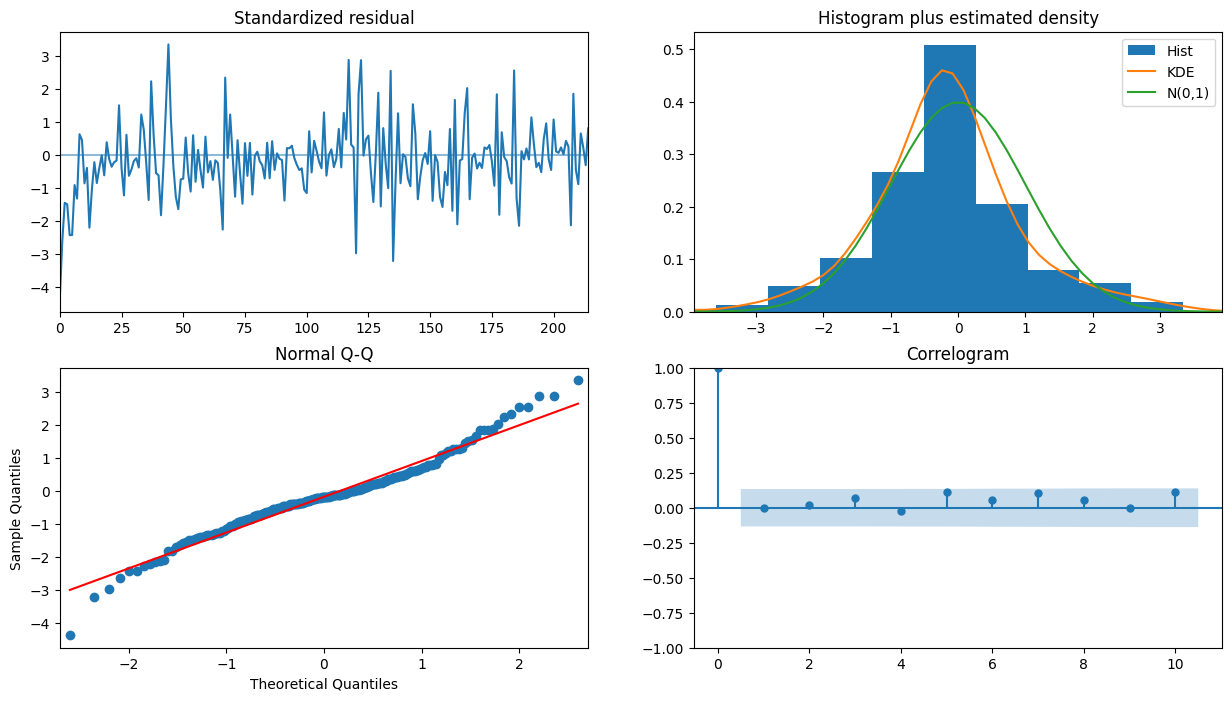

In [24]:
# Auto arima gives the value of p,q,d as 3,1,2
model_autoARIMA = auto_arima(train1['Close'], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=2,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [35]:

# Buat model SARIMA
model2 = sm.tsa.SARIMAX(train1['Close'], order=(3, 2, 1), seasonal_order=(2, 2, 1, 22))

# Fit model2 ke data
result = model2.fit()

# Lihat ringkasan model
print(result.summary())


c:\Users\Farisyid\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Farisyid\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Farisyid\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  217
Model:             SARIMAX(3, 2, 1)x(2, 2, 1, 22)   Log Likelihood               -1421.896
Date:                            Wed, 15 Nov 2023   AIC                           2859.792
Time:                                    10:58:55   BIC                           2884.926
Sample:                                         0   HQIC                          2869.990
                                            - 217                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0038      0.077     -0.050      0.960      -0.154       0.146
ar.L2         -0.0295      0.080   

In [36]:
sarimaxPred = result.forecast(len(test1))
sarimax_pred = pd.DataFrame(sarimaxPred).set_index(test1.index)
sarimax_pred.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25 entries, 2021-04-21 to 2021-05-31
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   predicted_mean  25 non-null     float64
dtypes: float64(1)
memory usage: 400.0 bytes


c:\Users\Farisyid\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Farisyid\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


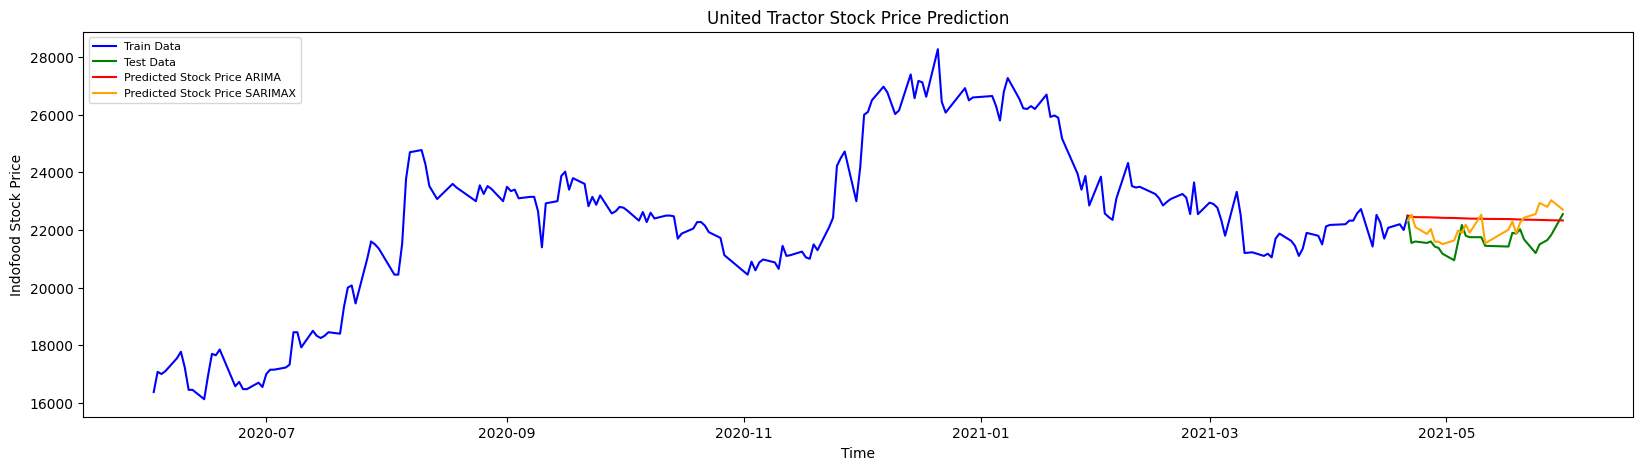

In [37]:
# Plot
plt.figure(figsize=(20, 5), dpi=100)
plt.plot(train1['Close'], label='Train Data', color='blue')
plt.plot(test1['Close'], label='Test Data', color='green')
plt.plot(arima, color='red', label='Predicted Stock Price ARIMA')
plt.plot(sarimax_pred, color='orange', label='Predicted Stock Price SARIMAX')
plt.title('United Tractor Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Indofood Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import math

In [39]:
# ARIMA Report Performance
mse = mean_squared_error(test1['Close'], arima['predicted_mean'])
print('MSE: '+str(mse))
mae = mean_absolute_error(test1['Close'], arima['predicted_mean'])
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(arima['predicted_mean'], test1['Close']))
print('RMSE: '+str(rmse))
mape = mean_absolute_percentage_error(test1['Close'], arima['predicted_mean'])
print('MAPE: '+str(mape))
#Around 6.7% MAPE implies the model is about 93.3% accurate in predicting the next 49 observations.

MSE: 659799.531576351
MAE: 742.0548423233269
RMSE: 812.2804513075216
MAPE: 0.03449487194484305


In [40]:
# SARIMAX Report Performance
mse = mean_squared_error(test1['Close'], sarimax_pred['predicted_mean'])
print('MSE: '+str(mse))
mae = mean_absolute_error(test1['Close'], sarimax_pred['predicted_mean'])
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test1['Close'], sarimax_pred['predicted_mean']))
print('RMSE: '+str(rmse))
mape = mean_absolute_percentage_error(test1['Close'], sarimax_pred['predicted_mean'])
print('MAPE: '+str(mape))
#Around 3.6 % MAPE implies the model is about 96.4% accurate in predicting the next 49 observations.


MSE: 441713.7183025178
MAE: 526.169335835607
RMSE: 664.6154664936092
MAPE: 0.024387631553224928


## **LSTM Model**

In [41]:
# Create a new dataframe with only the 'Close' column
data=df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset=data.values
# Get the number of rows to train the model on
training_data_lenLSTM = math.ceil(len(dataset)*.9)

training_data_lenLSTM

217

In [42]:
from sklearn.preprocessing import MinMaxScaler

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_dataLSTM = scaler.fit_transform(dataset)

scaled_dataLSTM

array([[0.02057613],
       [0.0781893 ],
       [0.07201646],
       [0.08024691],
       [0.11728395],
       [0.13580247],
       [0.09053498],
       [0.02674897],
       [0.02674897],
       [0.        ],
       [0.06790123],
       [0.12962963],
       [0.1255144 ],
       [0.14197531],
       [0.06378601],
       [0.03703704],
       [0.04938272],
       [0.02880658],
       [0.02880658],
       [0.0473251 ],
       [0.03497942],
       [0.07201646],
       [0.08436214],
       [0.08436214],
       [0.09053498],
       [0.09876543],
       [0.19135802],
       [0.19135802],
       [0.14814815],
       [0.19547325],
       [0.18106996],
       [0.17489712],
       [0.18106996],
       [0.19135802],
       [0.1872428 ],
       [0.26337449],
       [0.31893004],
       [0.32510288],
       [0.27366255],
       [0.40123457],
       [0.45061728],
       [0.44238683],
       [0.43004115],
       [0.35596708],
       [0.35596708],
       [0.44444444],
       [0.62962963],
       [0.705

In [43]:
# Create the training data set
# Create scaled training data set
train_dataLSTM = scaled_dataLSTM[0:training_data_lenLSTM, :]
# Split the data into xtrain and ytrain data sets
xtrain = []
ytrain = []

for i in range(22, len(train_dataLSTM)): # 22 is the number of time window for algorithm train in the number of time window
    xtrain.append(train_dataLSTM[i-22:i, 0])
    ytrain.append(train_dataLSTM[i,0])
    if i <= 22 :
        print(xtrain)
        print(ytrain)
        print()

[array([0.02057613, 0.0781893 , 0.07201646, 0.08024691, 0.11728395,
       0.13580247, 0.09053498, 0.02674897, 0.02674897, 0.        ,
       0.06790123, 0.12962963, 0.1255144 , 0.14197531, 0.06378601,
       0.03703704, 0.04938272, 0.02880658, 0.02880658, 0.0473251 ,
       0.03497942, 0.07201646])]
[0.08436213991769548]



In [44]:
# Convert the xtrain and ytrain to numpy arrays
xtrain, ytrain = np.array(xtrain), np.array(ytrain)

# Reshape the data
xtrain = np.reshape(xtrain, (xtrain.shape[0],xtrain.shape[1],1))
xtrain

array([[[0.02057613],
        [0.0781893 ],
        [0.07201646],
        ...,
        [0.0473251 ],
        [0.03497942],
        [0.07201646]],

       [[0.0781893 ],
        [0.07201646],
        [0.08024691],
        ...,
        [0.03497942],
        [0.07201646],
        [0.08436214]],

       [[0.07201646],
        [0.08024691],
        [0.11728395],
        ...,
        [0.07201646],
        [0.08436214],
        [0.08436214]],

       ...,

       [[0.40534979],
        [0.45884774],
        [0.47325103],
        ...,
        [0.50411523],
        [0.45884774],
        [0.48971193]],

       [[0.45884774],
        [0.47325103],
        [0.4526749 ],
        ...,
        [0.45884774],
        [0.48971193],
        [0.5       ]],

       [[0.47325103],
        [0.4526749 ],
        [0.4382716 ],
        ...,
        [0.48971193],
        [0.5       ],
        [0.48353909]]])

In [45]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [46]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(xtrain.shape[1],1)))
model.add(LSTM(50, return_sequences=False ))
model.add(Dense(25))
model.add(Dense(1))

In [47]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [48]:
# Train the model
model.fit(xtrain, ytrain, batch_size=1, epochs=1)

195/195 [==============================] - 5s 10ms/step - loss: 0.0175


In [49]:
# Create the testing data set
# Create a new array containing scaled values from index
test_dataLSTM = scaled_dataLSTM[training_data_lenLSTM - 22:, :]
# Create the data set xtest and ytest
xtest = []
ytest = dataset[training_data_lenLSTM:, :]
for i in range(22,len(test_dataLSTM)):
               xtest.append(test_dataLSTM[i-22:i, 0])
               
ytest

array([[21550.],
       [21600.],
       [21550.],
       [21600.],
       [21425.],
       [21375.],
       [21175.],
       [20950.],
       [21575.],
       [22175.],
       [21800.],
       [21750.],
       [21750.],
       [21450.],
       [21425.],
       [21900.],
       [21875.],
       [22025.],
       [21675.],
       [21200.],
       [21500.],
       [21650.],
       [21825.],
       [22550.]])

In [50]:
# Convert the data to a numpy array
xtest = np.array(xtest)
xtest

array([[0.4526749 , 0.4382716 , 0.40946502, 0.43004115, 0.47530864,
        0.46707819, 0.44238683, 0.49382716, 0.49794239, 0.5       ,
        0.51028807, 0.51028807, 0.5308642 , 0.54320988, 0.43621399,
        0.52674897, 0.50411523, 0.45884774, 0.48971193, 0.5       ,
        0.48353909, 0.52263374],
       [0.4382716 , 0.40946502, 0.43004115, 0.47530864, 0.46707819,
        0.44238683, 0.49382716, 0.49794239, 0.5       , 0.51028807,
        0.51028807, 0.5308642 , 0.54320988, 0.43621399, 0.52674897,
        0.50411523, 0.45884774, 0.48971193, 0.5       , 0.48353909,
        0.52263374, 0.44650206],
       [0.40946502, 0.43004115, 0.47530864, 0.46707819, 0.44238683,
        0.49382716, 0.49794239, 0.5       , 0.51028807, 0.51028807,
        0.5308642 , 0.54320988, 0.43621399, 0.52674897, 0.50411523,
        0.45884774, 0.48971193, 0.5       , 0.48353909, 0.52263374,
        0.44650206, 0.45061728],
       [0.43004115, 0.47530864, 0.46707819, 0.44238683, 0.49382716,
        0.4979423

In [51]:
# Reshape the data
xtest = np.reshape(xtest, (xtest.shape[0], xtest.shape[1],1 ))
xtest

array([[[0.4526749 ],
        [0.4382716 ],
        [0.40946502],
        [0.43004115],
        [0.47530864],
        [0.46707819],
        [0.44238683],
        [0.49382716],
        [0.49794239],
        [0.5       ],
        [0.51028807],
        [0.51028807],
        [0.5308642 ],
        [0.54320988],
        [0.43621399],
        [0.52674897],
        [0.50411523],
        [0.45884774],
        [0.48971193],
        [0.5       ],
        [0.48353909],
        [0.52263374]],

       [[0.4382716 ],
        [0.40946502],
        [0.43004115],
        [0.47530864],
        [0.46707819],
        [0.44238683],
        [0.49382716],
        [0.49794239],
        [0.5       ],
        [0.51028807],
        [0.51028807],
        [0.5308642 ],
        [0.54320988],
        [0.43621399],
        [0.52674897],
        [0.50411523],
        [0.45884774],
        [0.48971193],
        [0.5       ],
        [0.48353909],
        [0.52263374],
        [0.44650206]],

       [[0.40946502],
      

In [52]:
# Get the models predicted price values
predictions = model.predict(xtest)
predictions = scaler.inverse_transform(predictions)
predictions

1/1 [==============================] - 1s 858ms/step


array([[22382.693],
       [22347.7  ],
       [22293.146],
       [22226.795],
       [22162.709],
       [22094.727],
       [22025.402],
       [21947.459],
       [21858.414],
       [21808.088],
       [21822.568],
       [21852.193],
       [21886.188],
       [21921.043],
       [21934.79 ],
       [21929.68 ],
       [21948.482],
       [21975.795],
       [22014.973],
       [22038.2  ],
       [22019.79 ],
       [21995.871],
       [21980.988],
       [21980.48 ]], dtype=float32)

C:\Users\Farisyid\AppData\Local\Temp\ipykernel_5076\4042479416.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


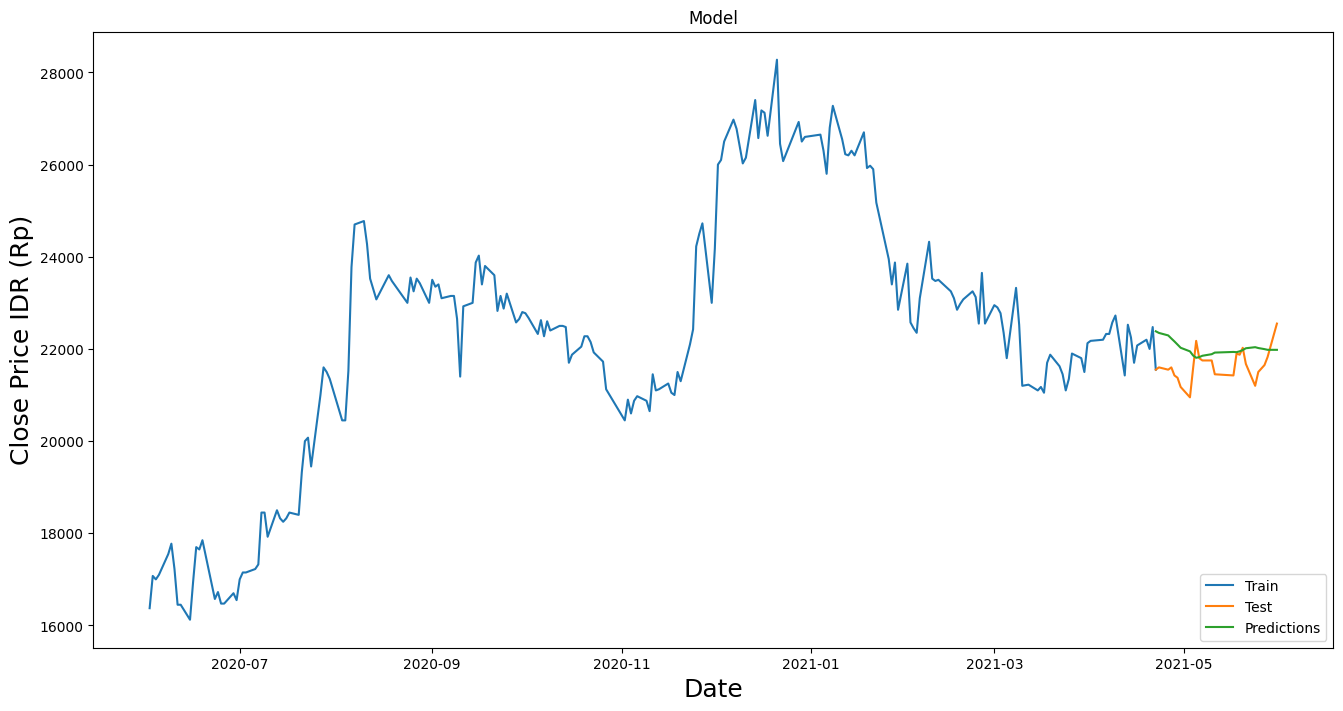

In [57]:
# Plot the data
train = data[:training_data_lenLSTM+1]
valid = data[training_data_lenLSTM:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price IDR (Rp)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()


In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - ytest)**2)
print('RMSE: '+str(rmse))
mse = mean_squared_error(ytest, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(ytest, predictions)
print('MAE: '+str(mae))
mape = mean_absolute_percentage_error(ytest, predictions)
print('MAPE: '+str(mape))

RMSE: 379.0904947916667
MSE: 302894.49827861786
MAE: 461.2268880208333
MAPE: 0.021449685087291424
